In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

In [5]:
def automatic_brightness_and_contrast(image, clip_hist_percent=1):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Calculate grayscale histogram
    hist = cv2.calcHist([gray],[0],None,[256],[0,256])
    hist_size = len(hist)
    
    # Calculate cumulative distribution from the histogram
    accumulator = []
    accumulator.append(float(hist[0]))
    for index in range(1, hist_size):
        accumulator.append(accumulator[index -1] + float(hist[index]))
    
    # Locate points to clip
    maximum = accumulator[-1]
    clip_hist_percent *= (maximum/100.0)
    clip_hist_percent /= 2.0
    
    # Locate left cut
    minimum_gray = 0
    while accumulator[minimum_gray] < clip_hist_percent:
        minimum_gray += 1
    
    # Locate right cut
    maximum_gray = hist_size -1
    while accumulator[maximum_gray] >= (maximum - clip_hist_percent):
        maximum_gray -= 1
    
    # Calculate alpha and beta values
    alpha = 255 / (maximum_gray - minimum_gray)
    beta = -minimum_gray * alpha

    auto_result = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return auto_result

In [6]:
img1 = cv2.imread("tartaruga1A.JPG")
img1 = automatic_brightness_and_contrast(img1)
img_gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img_gray1=cv2.GaussianBlur(img_gray1, (11, 11), 0)
t, img_gray1=cv2.threshold(img_gray1, 150, 255, cv2.THRESH_BINARY)

img2 = cv2.imread("tartaruga1B.JPG")
img2 = automatic_brightness_and_contrast(img2)
img_gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img_gray2=cv2.GaussianBlur(img_gray2, (11, 11), 0)
t, img_gray2=cv2.threshold(img_gray2, 150, 255, cv2.THRESH_BINARY)


In [7]:
med_val1 = np.median(img_gray1)
med_val2 = np.median(img_gray2)
lower1 = int(max(0 ,0.7*med_val1))
upper1 = int(min(255,1.3*med_val1))
lower2 = int(max(0 ,0.7*med_val2))
upper2 = int(min(255,1.3*med_val2))
edges1 = cv2.Canny(img_gray1, lower1, upper1)
edges2 = cv2.Canny(img_gray2, lower2, upper2)


In [8]:
contours1, hierarchy1 = cv2.findContours(edges1, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

contours2, hierarchy2 = cv2.findContours(edges2, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

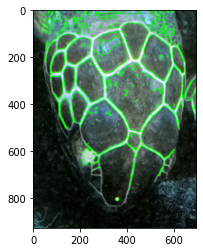

In [9]:
cv2.drawContours(img1, contours1, -1, (0, 255, 0), 2)
plt.imshow(img1)

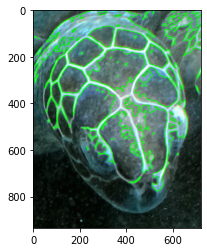

In [10]:
cv2.drawContours(img2, contours2, -1, (0, 255, 0), 2)
plt.imshow(img2)

In [11]:
diff=cv2.matchShapes(edges1, edges2, cv2.CONTOURS_MATCH_I2, 0)
diff

0.002651198166379265